<a href="https://colab.research.google.com/github/RubenQuispe/Machine-Learning-con-Python-001/blob/master/Primera_Iteraci%C3%B3n_Modelamiento_y_Evaluaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera Iteración Modelamiento y Evaluación
## Mg. Rubén Quispe
## Antes de entrenar un modelo, aprendamos sobre el funcionamiento y la API de scikit-learn

Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github](https://github.com/showcases/machine-learning). La librería incluye funcionalidades de:
Preprocesamiento de datos en  sklearn.preprocessing 
Algoritmos de Machine Learning en sklearn.linear_model, sklearn.svm, sklearn.ensemble, y muchos más.
Evaluación de modelos en sklearn.model_selection y sklearn.metrics

Una estructura de datos esencial en scikit-learn es el Estimator


In [ ]:
import numpy as np
import pandas as pd



![title](estimator.png)

Para poder escoger el estimator apropiado una excelente guia es el cheatsheet siguiente, hecho por uno de los core-dev de scikit-learn.

# Implementemos un modelo simple de regresión primero

In [ ]:
X = pd.read_csv('D:/TECHNOLOGY 2020/Data/X.csv')

In [ ]:
X

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2.009000e+03,1.780000e+00,1.780000e+02,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,5.911656e+08,5.911656e+08,5.911656e+08,143.0,5.911656e+08,7.1
2,300000000.0,9.634204e+08,2.007000e+03,2.350000e+00,1.690000e+02,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2.015000e+03,2.350000e+00,1.480000e+02,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2.012000e+03,2.350000e+00,1.640000e+02,106759.0,2.500000e+08,8.5
...,...,...,...,...,...,...,...,...
4099,7000.0,8.419260e+05,2.004000e+03,1.850000e+00,7.700000e+01,368.0,7.000000e+03,7.0
4100,7000.0,7.164400e+04,2.005000e+03,1.972579e+04,8.000000e+01,0.0,7.000000e+03,6.3
4101,7000.0,9.000000e+02,2.005000e+03,1.905686e+03,8.400000e+01,93.0,3.250000e+03,7.8
4102,3967.0,1.044300e+04,2.012000e+03,2.350000e+00,1.000000e+02,2386.0,3.669956e+03,6.3


In [ ]:
y = X['worldwide_gross']
y

0       2.783919e+09
1       2.058662e+09
2       9.634204e+08
3       8.796209e+08
4       1.084439e+09
            ...     
4099    8.419260e+05
4100    7.164400e+04
4101    9.000000e+02
4102    1.044300e+04
4103    1.810410e+05
Name: worldwide_gross, Length: 4104, dtype: float64

In [ ]:
X = X.drop('worldwide_gross',axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [ ]:
#revisando los datos 
print(len(X))
print(len(X_train))# el 60% de datos 
print(len(X_test)) # el 40% de datos

4104
2462
1642


In [ ]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()

In [ ]:
model.fit(X_train, y_train)# entrenamos el modelo

Lasso()

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted

array([-2.46035297e+07,  1.28074827e+08,  2.94613929e+07, ...,
        8.07738227e+07,  1.60096499e+08,  9.06084484e+07])

In [ ]:
predicted.shape

(1642,)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

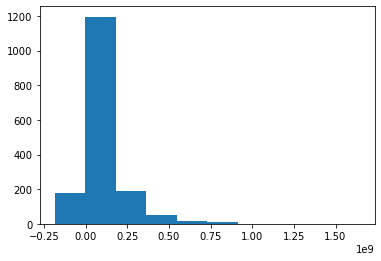

In [ ]:
plt.hist(predicted);

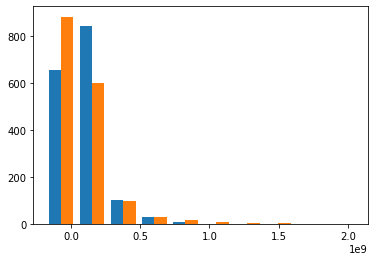

In [ ]:
#para comparar con los y
plt.hist([predicted, y_test]);

# Evaluemos de forma más fina el comportamiento de nuestro modelo

Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función estimator.score ya viene con una de las métricas de sklearn.metrics, que es la métrica sklearn.metric.r2_score

El score R2 de una regresión es una de las formas más comunes de entender su poder predictivo. Este mientras más cerca de 1 este, mejor es

Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media.

In [ ]:
model.score(X_test,y_test) # es bueno para una primera iteración

0.6021797062956953

Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. Un ejemplo es el siguiente:



Siempre visualiza tus resultados, aunque tengas un buen score de performance.

In [ ]:
residuals = y_test - predicted
residuals

3533    2.753595e+07
1144   -9.640421e+07
1766   -1.273392e+07
1213   -3.732444e+07
3849    1.977089e+07
            ...     
1573    7.582776e+07
2979   -2.467033e+07
2022   -6.593078e+06
840     5.264566e+07
1595   -5.921786e+07
Name: worldwide_gross, Length: 1642, dtype: float64

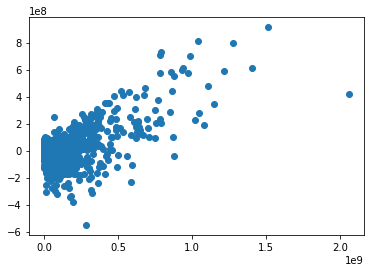

In [ ]:
plt.scatter(y_test, residuals)

In [ ]:
ap_residuals = np.abs(residuals) / y_test # 

In [ ]:
ap_residuals

3533       9.390182
1144       3.043963
1766       0.761258
1213       0.732273
3849    1304.492522
           ...     
1573       0.538187
2979      41.756290
2022       0.088879
840        0.247462
1595       1.886485
Name: worldwide_gross, Length: 1642, dtype: float64

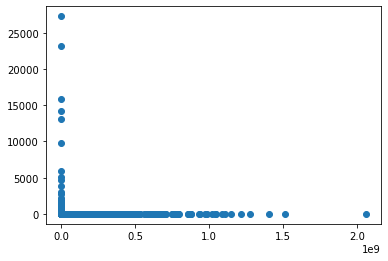

In [ ]:
plt.scatter(y_test, ap_residuals)

In [ ]:
lap_residuals = np.log(ap_residuals)

In [ ]:
lap_residuals

3533    2.239665
1144    1.113160
1766   -0.272783
1213   -0.311602
3849    7.173569
          ...   
1573   -0.619548
2979    3.731850
2022   -2.420484
840    -1.396497
1595    0.634715
Name: worldwide_gross, Length: 1642, dtype: float64

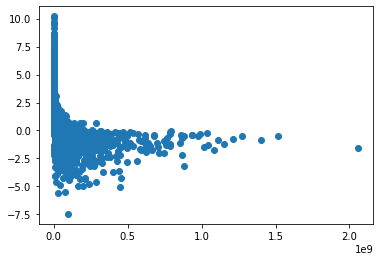

In [ ]:

plt.scatter(y_test,lap_residuals)

AttributeError: 'Polygon' object has no property 'normed'

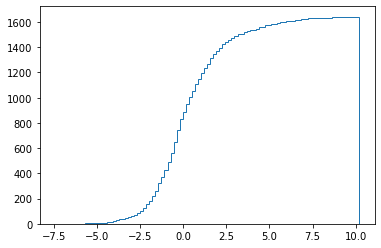

In [ ]:
#funcion acumulativa 
plt.hist(lap_residuals,bins=100, normed=1, histtype='step', cumulative=True);

AttributeError: 'Polygon' object has no property 'normed'

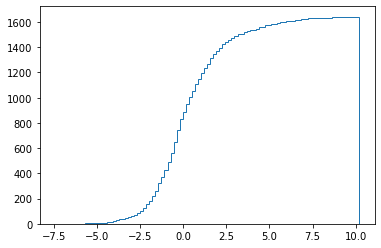

In [ ]:

plt.hist(lap_residuals, bins=100, normed=1, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

ValueError: x and y must be the same size

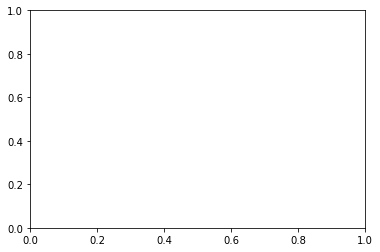

In [ ]:
plt.scatter(np.arange(8),model.coef_);

In [ ]:

X = pd.read_csv('D:/TECHNOLOGY 2020/Data/X.csv')

In [ ]:
X = X.drop('worldwide_gross',axis=1)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [ ]:

model = Lasso()
model.fit(X_train,y_train)

C:\Users\RUBEN\Anaconda3\envs\ambiente2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5576687372791863e+19, tolerance: 7611686705558269.0
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
model.score(X_test,y_test)


0.5883520949176015

In [ ]:

X.columns

Index(['production_budget', 'title_year', 'aspect_ratio', 'duration.1',
       'cast_total_facebook_likes', 'budget', 'imdb_score'],
      dtype='object')

In [ ]:
for el in zip(list(X.columns),list(model.coef_)):
    print(el)


('production_budget', 3.0294942762588724)
('title_year', -1.1135394519261967)
('aspect_ratio', 0.007164138461936679)
('duration.1', 2.9776253621162807)
('cast_total_facebook_likes', 85.19913237197864)
('budget', -0.00850431277744765)
('imdb_score', 25020035.349651244)
